In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
train_csv = "../planttraits2024/train.csv"
target_columns = ['X4_mean', 'X11_mean', 'X18_mean', 'X50_mean', 'X26_mean', 'X3112_mean']


In [3]:
train = pd.read_csv(train_csv)
train.describe()

,id,WORLDCLIM_BIO1_annual_mean_temperature,WORLDCLIM_BIO12_annual_precipitation,WORLDCLIM_BIO13.BIO14_delta_precipitation_of_wettest_and_dryest_month,WORLDCLIM_BIO15_precipitation_seasonality,WORLDCLIM_BIO4_temperature_seasonality,WORLDCLIM_BIO7_temperature_annual_range,SOIL_bdod_0.5cm_mean_0.01_deg,SOIL_bdod_100.200cm_mean_0.01_deg,SOIL_bdod_15.30cm_mean_0.01_deg,...,X18_mean,X26_mean,X50_mean,X3112_mean,X4_sd,X11_sd,X18_sd,X26_sd,X50_sd,X3112_sd
count,5.548900e+04,55489.000000,55489.000000,55489.000000,55489.000000,55489.000000,55489.000000,55489.000000,55489.000000,55489.000000,...,5.548900e+04,5.548900e+04,55489.000000,5.548900e+04,39148.000000,39148.000000,39148.000000,39148.000000,39148.000000,39148.000000
mean,1.714553e+08,14.577142,1058.710939,138.164359,56.727213,518.711405,25.227185,116.895673,140.259205,128.187695,...,1.969902e+04,3.459399e+03,13.528574,3.975552e+05,0.007833,1.073573,16.003476,110.733150,0.075108,453.017146
std,4.087868e+07,7.584290,768.992166,136.409312,31.692061,316.618440,9.151237,17.607857,15.075214,16.030602,...,2.309747e+06,2.471919e+05,1356.480785,9.152463e+07,0.012046,4.098486,881.605417,8361.855750,0.159520,4196.228211
min,2.637500e+04,-13.731130,0.000000,0.000000,0.000000,9.877081,7.658674,29.000000,46.000000,42.000000,...,2.330000e-08,5.500000e-07,0.000097,7.690000e-08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.658614e+08,9.247916,528.315552,53.000000,29.685472,300.478760,18.800001,106.000000,131.000000,118.000000,...,3.102831e-01,5.613414e-01,1.173489,2.552815e+02,0.003292,0.174866,0.029985,0.042226,0.017207,17.259899
50%,1.915103e+08,15.536692,853.776184,95.500000,50.196312,446.522308,23.681778,118.000000,142.000000,129.000000,...,7.156651e-01,2.519985e+00,1.480060,7.244318e+02,0.004996,0.357821,0.095136,0.238664,0.033162,63.322952
75%,1.951001e+08,20.238457,1352.000000,181.485718,80.811249,690.003845,30.399998,130.000000,150.000000,139.000000,...,3.586311e+00,1.491886e+01,1.926343,2.148630e+03,0.007774,1.092862,0.330147,1.516574,0.082851,226.990400
max,1.967668e+08,30.294445,8392.463867,2448.964355,169.582291,2025.894653,63.657616,194.000000,192.000000,201.000000,...,2.720494e+08,3.106555e+07,159759.897700,2.155911e+10,0.284052,515.672017,63535.386846,739701.798818,9.729029,387491.201058


In [4]:
for col in train.columns:
	print(col)

id
WORLDCLIM_BIO1_annual_mean_temperature
WORLDCLIM_BIO12_annual_precipitation
WORLDCLIM_BIO13.BIO14_delta_precipitation_of_wettest_and_dryest_month
WORLDCLIM_BIO15_precipitation_seasonality
WORLDCLIM_BIO4_temperature_seasonality
WORLDCLIM_BIO7_temperature_annual_range
SOIL_bdod_0.5cm_mean_0.01_deg
SOIL_bdod_100.200cm_mean_0.01_deg
SOIL_bdod_15.30cm_mean_0.01_deg
SOIL_bdod_30.60cm_mean_0.01_deg
SOIL_bdod_5.15cm_mean_0.01_deg
SOIL_bdod_60.100cm_mean_0.01_deg
SOIL_cec_0.5cm_mean_0.01_deg
SOIL_cec_100.200cm_mean_0.01_deg
SOIL_cec_15.30cm_mean_0.01_deg
SOIL_cec_30.60cm_mean_0.01_deg
SOIL_cec_5.15cm_mean_0.01_deg
SOIL_cec_60.100cm_mean_0.01_deg
SOIL_cfvo_0.5cm_mean_0.01_deg
SOIL_cfvo_100.200cm_mean_0.01_deg
SOIL_cfvo_15.30cm_mean_0.01_deg
SOIL_cfvo_30.60cm_mean_0.01_deg
SOIL_cfvo_5.15cm_mean_0.01_deg
SOIL_cfvo_60.100cm_mean_0.01_deg
SOIL_clay_0.5cm_mean_0.01_deg
SOIL_clay_100.200cm_mean_0.01_deg
SOIL_clay_15.30cm_mean_0.01_deg
SOIL_clay_30.60cm_mean_0.01_deg
SOIL_clay_5.15cm_mean_0.01_deg
S

In [5]:
print(f"len train: {len(train)}")
print(f"columns: {[i for i in train.columns if i.startswith('X')]}")
train_y = train[[i for i in train.columns if i.startswith('X')]]
train_y_mean = train[[i for i in train.columns if i.startswith('X') and i.endswith('mean')]]
print(f"Number of unique set of y values: {len(train_y.drop_duplicates(inplace=False))}")
print(f"Number of unique set of annual mean temp: {len(train['WORLDCLIM_BIO1_annual_mean_temperature'].drop_duplicates(inplace=False))}")
print(f"Number of unique set of y mean values: {len(train_y_mean.drop_duplicates(inplace=False))}")
print(f"Number of unique set of X4_mean values: {len(train['X4_mean'].drop_duplicates(inplace=False))}")
print(len(train.columns))

len train: 55489
columns: ['X4_mean', 'X11_mean', 'X18_mean', 'X26_mean', 'X50_mean', 'X3112_mean', 'X4_sd', 'X11_sd', 'X18_sd', 'X26_sd', 'X50_sd', 'X3112_sd']
Number of unique set of y values: 19799
Number of unique set of annual mean temp: 36526
Number of unique set of y mean values: 19799
Number of unique set of X4_mean values: 18977
176


In [19]:
pd.options.display.max_rows = 200
train.isnull().sum()

id                                                                           0
WORLDCLIM_BIO1_annual_mean_temperature                                       0
WORLDCLIM_BIO12_annual_precipitation                                         0
WORLDCLIM_BIO13.BIO14_delta_precipitation_of_wettest_and_dryest_month        0
WORLDCLIM_BIO15_precipitation_seasonality                                    0
WORLDCLIM_BIO4_temperature_seasonality                                       0
WORLDCLIM_BIO7_temperature_annual_range                                      0
SOIL_bdod_0.5cm_mean_0.01_deg                                                0
SOIL_bdod_100.200cm_mean_0.01_deg                                            0
SOIL_bdod_15.30cm_mean_0.01_deg                                              0
SOIL_bdod_30.60cm_mean_0.01_deg                                              0
SOIL_bdod_5.15cm_mean_0.01_deg                                               0
SOIL_bdod_60.100cm_mean_0.01_deg                    

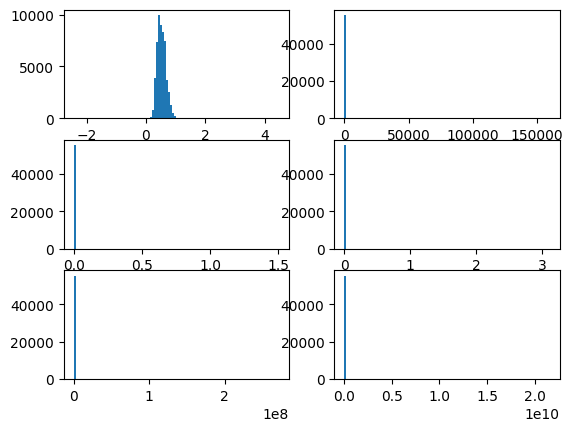

In [7]:

fig, axs = plt.subplots(3, 2)
for i, target in enumerate(target_columns):
	axs[i + (-3 if i > 2 else 0), 1 if i > 2 else 0].hist(train[target], bins=100)

In [8]:
for column in target_columns:
    lower_quantile = train[column].quantile(0.005)
    upper_quantile = train[column].quantile(0.985)  
    train = train[(train[column] >= lower_quantile) & (train[column] <= upper_quantile)]

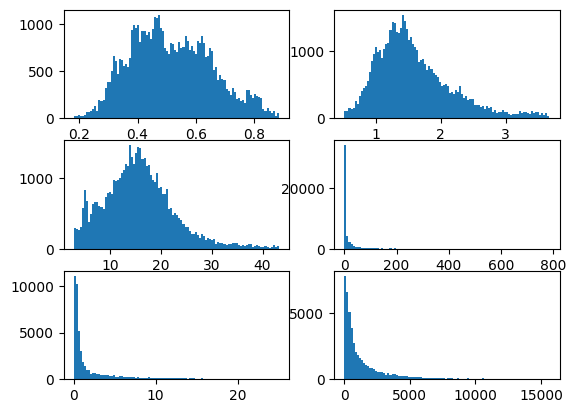

In [9]:
fig, axs = plt.subplots(3, 2)
for i, target in enumerate(target_columns):
	axs[i + (-3 if i > 2 else 0), 1 if i > 2 else 0].hist(train[target], bins=100)


In [ ]:
target_columns = ['X4_mean', 'X11_mean', 'X18_mean', 'X50_mean', 'X26_mean', 'X3112_mean']

train[train[]]